# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [1]:
import pandas as pd

# 1. import data

In [2]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [4]:
df.describe().round(2).reset_index(level=0)

,index,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,count,2.000000e+03,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
1,mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
2,std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
3,min,1.000000e+08,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
4,25%,1.000005e+08,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
5,50%,1.000010e+08,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
6,75%,1.000015e+08,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
7,max,1.000020e+08,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [5]:
# 檢查na 值
df.isnull().sum()
# 如果有na值 df.dropna(inplace = True)

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
# 性別總數
df.groupby(by="Sex",as_index=False).size().rename({'size':'cnt'}, axis=1)

,Sex,cnt
0,0,1086
1,1,914


In [7]:
# 現在是否有職業
df.groupby(by="Settlement size",as_index=False).size().rename({'size':'cnt'}, axis=1)

,Settlement size,cnt
0,0,989
1,1,544
2,2,467


# 資料前處理

In [8]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [9]:
# drop 掉id
df_new = df.drop(columns=["ID"])
df_new.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [10]:
#標準化
from sklearn.preprocessing import StandardScaler

# 將類型以外的 11 個特徵全取出
X = df_new.iloc[:, 0:] 

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [11]:
# 更新 DataFrame
df_new.iloc[:, 0:] = Z_sk
df_new.head()

C:\Users\Wilson\AppData\Local\Temp\ipykernel_43000\192037213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.91739884  1.09003844 -0.91739884 ... -0.91739884  1.09003844
 -0.91739884]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_new.iloc[:, 0:] = Z_sk
C:\Users\Wilson\AppData\Local\Temp\ipykernel_43000\192037213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.99302433  1.00702467 -0.99302433 ... -0.99302433  1.00702467
 -0.99302433]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_new.iloc[:, 0:] = Z_sk
C:\Users\Wilson\AppData\Local\Temp\ipykernel_43000\192037213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.65361447 -1.18713209  1.11731585 ... -0.41898277 -1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [12]:
# 顯示各特徵的平均與標準差
df_stats = df_new.describe().loc[['mean', 'std']]
df_stats.round(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Modeling
- 降維
  - PCA
  - MDS
- 分群
  - k-means


## PCA

In [13]:
# 做七個主成分的時候 解釋力從1到7排列
from sklearn.decomposition import PCA
import numpy as np

pca_7d = PCA(7, random_state=123)
pca_7d.fit(Z_sk)
np.round(pca_7d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06, 0.04, 0.02])

In [14]:
print(f'前2個主成分解釋力達: {sum(pca_7d.explained_variance_ratio_.tolist()[:2])}') 
print(f'前3個主成分解釋力達: {sum(pca_7d.explained_variance_ratio_.tolist()[:3])}') 

前2個主成分解釋力達: 0.6194725095733011
前3個主成分解釋力達: 0.8076836525675646


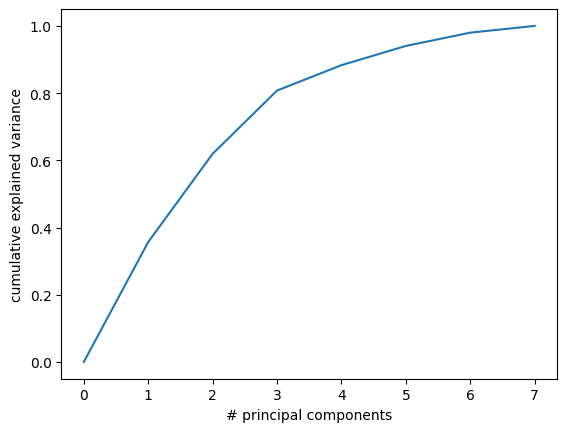

In [15]:
import matplotlib.pyplot as plt
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_7d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [16]:
# 主成分分析其實就是在分析共變異數矩陣(covariance matrix)，矩陣的特徵向量(eigenvector)就是主成分，特徵值(eigenvalue)由大到小依序排列就是第一主成分、第二主成分...。
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(Z_sk)

In [17]:
# 檢視2個主成分跟原本特徵之關係
# 可以為主成分命名 變成對所有特徵突出的做新的綜合特徵
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
第一主成分,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
第二主成分,0.46,0.51,0.31,0.64,0.12,0.015,-0.07


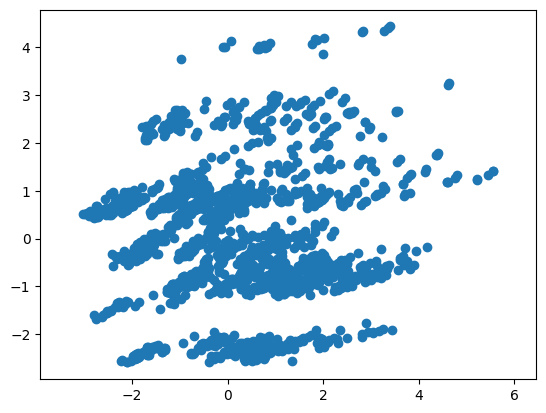

In [18]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal');

In [19]:
# 把主成分 concat回原本的資料表

# 興建df
factor_tb = pd.DataFrame(pca_trans, columns=['factor1', 'factor2'])

df_factor_tb = pd.concat([df_new.reset_index(drop=True), factor_tb], axis=1)
df_factor_tb

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,factor1,factor2
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2.514746,0.834122
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0.344935,0.598146
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,-0.651063,-0.680093
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1.714316,-0.579927
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1.626745,-0.440496
...,...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,-0.866034,0.298330
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,-1.114957,0.794727
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,-1.452298,-2.235937
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,-2.241453,0.627108


PCA visualization:


c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


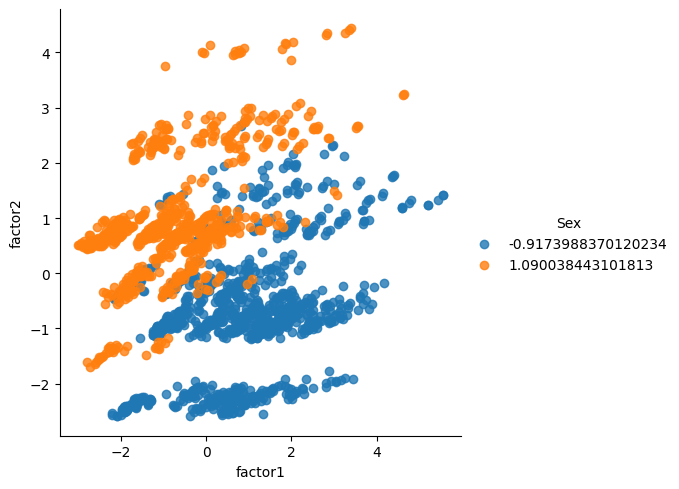

In [20]:
# 男女在主成分分析的圖表化
# 可以為主成分命名 變成對所有特徵突出的做新的綜合特徵 畫圖時可以用男女做解釋在主成分中的定位
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

print('PCA visualization:')
sns.lmplot(data=df_factor_tb, x='factor1', y='factor2', hue='Sex', 
                   fit_reg=False, legend=True, legend_out=True)

## K-means
- 手軸法
- 輪廓分析法

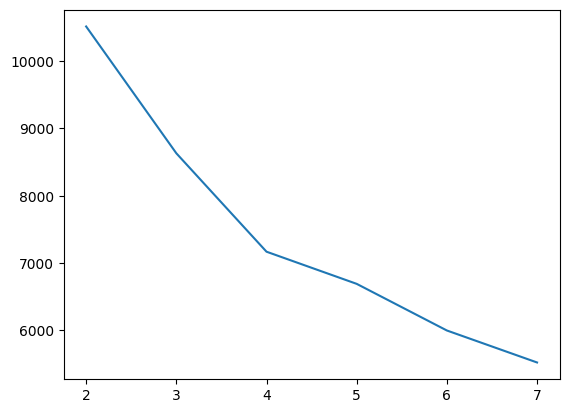

In [21]:
from sklearn.cluster import KMeans

# 用手軸法找最適合分幾群 


clusters=list(range(2,8))  #2-8群
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(Z_sk)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd);

In [24]:
# 輪廓分析法
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14 ]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(Z_sk)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Z_sk, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))




For n_clusters=2, the silhouette score is 0.24820216342164297
For n_clusters=3, the silhouette score is 0.27172237898695484
For n_clusters=4, the silhouette score is 0.26863668715598654
For n_clusters=5, the silhouette score is 0.26348924739257557
For n_clusters=6, the silhouette score is 0.264939240578794
For n_clusters=7, the silhouette score is 0.2789461557261559
For n_clusters=8, the silhouette score is 0.26474682868998506
For n_clusters=9, the silhouette score is 0.2763437275474928
For n_clusters=10, the silhouette score is 0.29874225315151126
For n_clusters=11, the silhouette score is 0.30728281599219465
For n_clusters=12, the silhouette score is 0.31965776286733966
For n_clusters=13, the silhouette score is 0.314939089959443
For n_clusters=14, the silhouette score is 0.3164406291694401


 (silhouette score越大越好)

 因此選12群

In [41]:
cluster = KMeans(n_clusters = 12, random_state = 111)
cluster.fit(Z_sk)
y_kmeans = cluster.predict(Z_sk)
print(y_kmeans)

[3 5 2 ... 6 1 6]


In [26]:
#count number of records in every cluster
pd.Series(cluster.labels_).value_counts()

5     382
0     269
1     226
2     185
6     161
8     158
4     153
11    134
7     109
3      95
9      90
10     38
Name: count, dtype: int64

檢視分群結果

In [29]:
# 把k-means結果做成df 
pred = pd.DataFrame(cluster.labels_, columns=['k_cluster'])
# concat回原本的df
kmeans_result = pd.concat([df.reset_index(drop=True), pred], axis=1)
kmeans_result

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,k_cluster
0,100000001,0,0,67,2,124670,1,2,3
1,100000002,1,1,22,1,150773,1,2,5
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,8
1996,100001997,1,1,27,1,117744,1,0,5
1997,100001998,0,0,31,0,86400,0,0,6
1998,100001999,1,1,24,1,97968,0,0,1


In [30]:
# 群類=4的data
kmeans_result[kmeans_result['k_cluster'] == 4].head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,k_cluster
9,100000010,0,1,28,1,174646,2,0,4
24,100000025,0,1,26,1,103667,1,2,4
30,100000031,0,1,36,1,159646,1,1,4
41,100000042,0,1,26,1,130921,1,0,4
43,100000044,0,1,24,1,155104,1,1,4


In [31]:
# 12群的平均
kmeans_result.groupby(['k_cluster'], as_index=True).mean()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
k_cluster,,,,,,,,
0,1.000007e+08,0.000000,0.000000,38.947955,0.773234,130448.587361,0.970260,1.587361
1,1.000013e+08,0.818584,1.000000,28.283186,1.000000,83866.340708,0.000000,0.000000
2,1.000010e+08,0.000000,0.000000,40.854054,1.021622,104836.389189,0.340541,0.081081
3,1.000009e+08,0.010526,0.326316,60.526316,2.021053,140820.126316,0.968421,1.147368
4,1.000008e+08,0.000000,1.000000,29.045752,1.000000,123263.241830,1.117647,1.084967
5,1.000010e+08,1.000000,1.000000,27.675393,1.000000,119936.238220,1.052356,0.743455
6,1.000009e+08,0.000000,0.000000,27.031056,0.000000,103243.037267,0.590062,0.360248
7,1.000010e+08,0.880734,0.844037,51.256881,2.119266,111386.963303,0.229358,0.045872
8,1.000017e+08,1.000000,0.000000,33.310127,0.797468,95567.879747,0.379747,0.063291


### 劃出散佈圖